In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/Tensorflow/HotDog 🌭 Classifier'

/content/drive/MyDrive/Tensorflow/HotDog 🌭 Classifier


# About Dataset
This data is taken from Hotdog-Not-Hotdog Dataset from Kaggle
link => https://www.kaggle.com/datasets/yashvrdnjain/hotdognothotdog

Dataset contains images from 2 different classes..
1. Images of Hotdog
2. Images that does not contain Hotdog

There are about 2300 training images of each classes and about 500 test images of each classes

Total Training Images: 3000

Total Testing Images: 644 

## In this Notebook 📔 
1. We will train our model on entire dataset as it small
2. Converting these images to four numpy arrays..
* training_images </br>
* training_labels</br>
* testing_images</br>
* testing_lables</br>

3. We will preprocess the data such as encoding labels, scaling images and shuffling..
4. then, Train simple convolution neural network with 
5 Convolutional Layer and Adam optimizer and model our predictions.
5. We will then, train on pretrained vgg16 model with some added Dense Layers to see if we can improve our model's performance...

Note: There are some utilities function's 

1. training_graph -> Displays Loss and Accuracy Graph
2. display_random_image(images, labels, classes) -> display's random image each time rum with provided label's   


# Importing Libraries

In [103]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
from sklearn.utils import shuffle
import seaborn as sns

In [104]:
# Utilities Function's

def display_random_image(images, labels):
  index = random.randint(0,len(images))
  plt.imshow(images[index])
  plt.title(str(index)+'# '+labels[index])

# Visualising Model Predictions on random image 
def display_prediction_image(images, labels, classes):
  ind = random.randint(0, len(labels))
  plt.imshow(images[ind])
  plt.title(classes[np.argmax(labels[ind])])

# Plot's Accuracy and Loss of Model
def training_graph(history):
  # Accuracy Plot
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  # Loss Plot
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

def training(model, train_images, train_labels, test_images, test_labels, batch_size=32, epochs=10, callback=None):
  # Fitting Model
  history = model.fit(
    train_images,
    train_labels, 
    batch_size=batch_size, 
    epochs=epochs, 
    validation_split=0.3, 
    callbacks=callback, 
    verbose=1
  )
  
  training_graph(history)
  # Accuracy
  _, accuracy = model.evaluate(test_images, test_labels, batch_size=batch_size)
  predictions = model.predict(test_images)
  return accuracy, predictions

def display_incorrect_classification(test_images, test_labels, predictions, classes):
  incorrect_indexes = np.where(test_labels.flatten() != predictions)
  ind = np.random.choice(incorrect_indexes[0], 16)
  fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
  axs = axs.flatten()
  for i, ax in zip(ind, axs):
    ax.imshow(test_images[i])
    ax.title.set_text('{}#Predicted = {} \nReal = {}'.format(i, classes[predictions[i]], classes[test_labels[i][0]]))
    ax.axis('off')  
  plt.subplots_adjust(hspace=0.5)
  fig.tight_layout()
  plt.show()


def dataframe_generator(path, count=None, classes_to_take=None):
  images, labels, classes = list(), list(), list()
  for root, fol, files in os.walk(path):
    number = 0
    for file in tqdm(files):
      img_path = os.path.join(root, file)
      label = root.replace('\\', '/').split('/')[-1]
      if classes_to_take and label not in classes_to_take:
        break
      if label not in classes: classes.append(label)
      # Augment Image
      img = cv2.imread(img_path)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      img = cv2.resize(img, IMAGE_SIZE)
      
      if count and number>=count: break
        
      images.append(img)
      labels.append(label)
      number+=1
  print('Found '+str(len(classes))+' Classes containing '+str(len(images))+' images...')
  print('Classes: ', classes)
  return np.array(images), np.array(labels)

# Save Numpy Data
def save_data():
  # Saving Numpy Data
  np.save('./data/train_images', train_images)
  np.save('./data/test_images', test_images)
  np.save('./data/train_labels', train_labels)
  np.save('./data/test_labels', test_labels)

def display_confusion_matrix(predictions, labels):
  cf_matrix = confusion_matrix(predictions, labels)
  ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
              fmt='.2%', cmap='Blues')

  ax.set_title('Confusion Matrix\n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['Hotdog','NotHotDog'])
  ax.yaxis.set_ticklabels(['Hotdog','NotHotDog'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()

### Generating Dataframe
we already have generated numpy arrays no need to run this cell

In [ ]:

TRAIN_PATH = './data/hotdog-nothotdog/train/'
TEST_PATH = '/data/hotdog-nothotdog/test/'
IMAGE_SIZE = (150, 150)

train_images, train_labels = dataframe_generator(train_path)
test_images, test_labels = dataframe_generator(test_path)
save_data()

0it [00:00, ?it/s]
100%|██████████| 1500/1500 [00:03<00:00, 444.44it/s]


Found 2 Classes containing 3000 images...
Classes:  ['hotdog', 'nothotdog']


0it [00:00, ?it/s]
100%|██████████| 322/322 [00:00<00:00, 459.92it/s]


Found 2 Classes containing 644 images...
Classes:  ['hotdog', 'nothotdog']


# Loading Numpy Data Array's

In [105]:
# Loading Numpy Data Array's
train_images = np.load('./data/train_images.npy')
train_labels = np.load('./data/train_labels.npy')
test_images = np.load('./data/test_images.npy')
test_labels = np.load('./data/test_labels.npy')

Shapes of Data

train_images shape:  (3498, 150, 150, 3)
train_labels shape:  (3498,)
test_images shape:  (1144, 150, 150, 3)
test_labels shape:  (1144,)

Image Shape:  (150, 150)
No of Classes:  2
Classes:  ['hotdog', 'nothotdog']


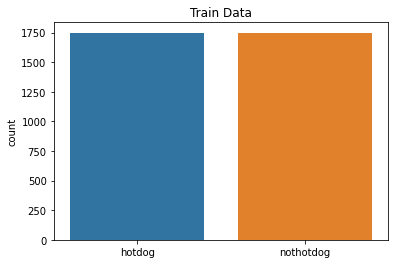

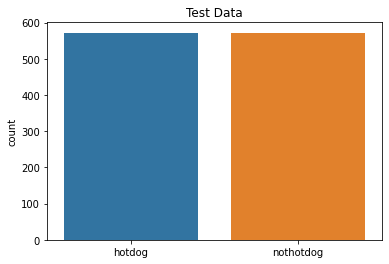

In [106]:
# About Dataset
print('Shapes of Data\n')
print('train_images shape: ', train_images.shape)
print('train_labels shape: ', train_labels.shape)
print('test_images shape: ', test_images.shape)
print('test_labels shape: ', test_labels.shape)
print('\nImage Shape: ', train_images.shape[1:3])

classes = np.unique(train_labels).tolist()
print('No of Classes: ', len(classes))
print('Classes: ', classes)

sns.countplot(x=list(train_labels))
plt.title('Train Data')
plt.show()

sns.countplot(x=list(test_labels))
plt.title('Test Data')
plt.show()

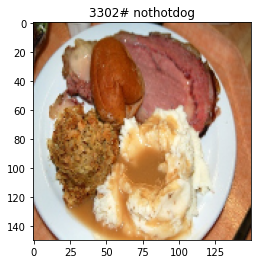

In [108]:
display_random_image(train_images, train_labels)

# Encoding Label's
* 'hotdog' -> 0,  
* 'nothotdog'-> 1,  

In [109]:
# Encoding Label's
my_dict = {i:classes.index(i) for i in classes}

if train_labels[0] in classes:
  train_labels = np.vectorize(my_dict.get)(train_labels)
  test_labels = np.vectorize(my_dict.get)(test_labels)

print(my_dict)
print(train_labels)

{'hotdog': 0, 'nothotdog': 1}
[0 0 0 ... 1 1 1]


# Shuffling Data using keras.shuffle

In [110]:
# Shuffling Data
train_images, train_labels = shuffle(train_images, train_labels, random_state=42)
test_images, test_labels = shuffle(test_images, test_labels, random_state=42)
train_labels

array([0, 1, 1, ..., 0, 0, 1])

# Reshaping Labels array from (1800, ) to (1800, 1) 
as it is required by neural network...

In [111]:
train_labels = train_labels.reshape(-1, 1)
test_labels = test_labels.reshape(-1, 1)

In [112]:
print("New Label's shape")
print('train_labels shape: ', train_labels.shape)
print('test_labels shape: ', test_labels.shape)

New Label's shape
train_labels shape:  (3498, 1)
test_labels shape:  (1144, 1)


# Simple Convoluntion Neural Network
with following parameters

* batch_size = 32  
* epochs = 20  
* optimizer = 'Adam'  
* loss = 'sparse_categorical_crossentropy'
* metrics = 'accuracy'
* validation_split = 0.3

In [129]:
# Data Augmentation Layer
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.3),
  #layers.RandomContrast(factor=0.1),
])

Epoch 1/50
24/25 [===========================>..] - ETA: 0s - loss: 0.6958 - accuracy: 0.4833
Epoch 1: saving model to model_checkpoints/
25/25 [==============================] - 2s 46ms/step - loss: 0.6957 - accuracy: 0.4841 - val_loss: 0.6926 - val_accuracy: 0.4971 - lr: 0.0010
Epoch 2/50
23/25 [==========================>...] - ETA: 0s - loss: 0.6859 - accuracy: 0.5496
Epoch 2: saving model to model_checkpoints/
25/25 [==============================] - 1s 35ms/step - loss: 0.6847 - accuracy: 0.5523 - val_loss: 0.6803 - val_accuracy: 0.5695 - lr: 0.0010
Epoch 3/50
23/25 [==========================>...] - ETA: 0s - loss: 0.6558 - accuracy: 0.6057
Epoch 3: saving model to model_checkpoints/
25/25 [==============================] - 1s 35ms/step - loss: 0.6577 - accuracy: 0.6038 - val_loss: 0.6642 - val_accuracy: 0.6076 - lr: 0.0010
Epoch 4/50
24/25 [===========================>..] - ETA: 0s - loss: 0.6616 - accuracy: 0.6104
Epoch 4: saving model to model_checkpoints/
25/25 [============

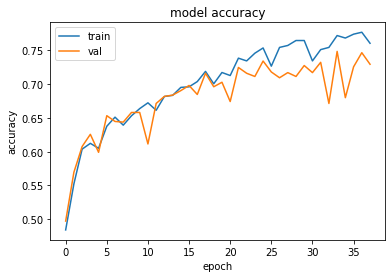

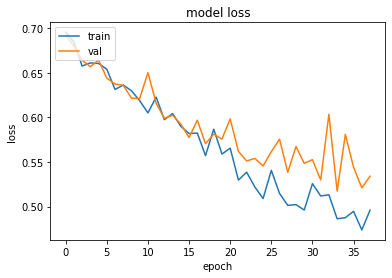

In [130]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import BinaryAccuracy
# Model Initialization
inputs = keras.Input(shape=(150, 150, 3))
x = layers.Rescaling(1./255)(inputs)
x = data_augmentation(x)

x = layers.AveragePooling2D((2, 2), 2)(x)
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.MaxPool2D()(x)
x = layers.Dropout(0.1)(x)

x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.MaxPool2D()(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPool2D()(x)
x = layers.Dropout(0.5)(x)

x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.MaxPool2D()(x)
x = layers.Dropout(0.5)(x)

x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x) 
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs, name='Hotdog_Model_1')

# Optimizer
# optimizer = SGD(learning_rate=0.01, momentum=0.9)
optimizer = Adam(learning_rate=0.001)

# Callbacks 
filepath = 'model_checkpoints/'
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True),
    keras.callbacks.CSVLogger('training.log'),
    keras.callbacks.ModelCheckpoint(filepath=filepath, save_freq='epoch', save_weights_only=True, verbose=1),
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001, verbose=2),
    #keras.callbacks.LearningRateScheduler(lr_decay, verbose=1)
]
# Compiling Model
# binary_accuracy = BinaryAccuracy(name="accuracy", dtype=None, threshold=0.5)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=50, batch_size=100, validation_split=0.3, callbacks=callbacks)
training_graph(history)

In [131]:
# evaluate the model
_, train_acc = model.evaluate(train_images, train_labels)
_, test_acc = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images).flatten()
predictions = np.where(predictions>0.5, 1, 0)
print('Train Accuracy : %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))

36/36 [==============================] - 0s 5ms/step - loss: 0.5577 - accuracy: 0.7281
Train Accuracy : 0.773, Test Accuracy: 0.728


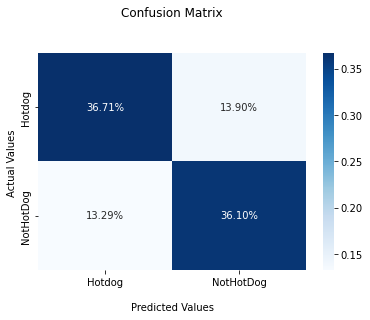

In [132]:
display_confusion_matrix(predictions, test_labels)

# Incorrect Classifications by our model

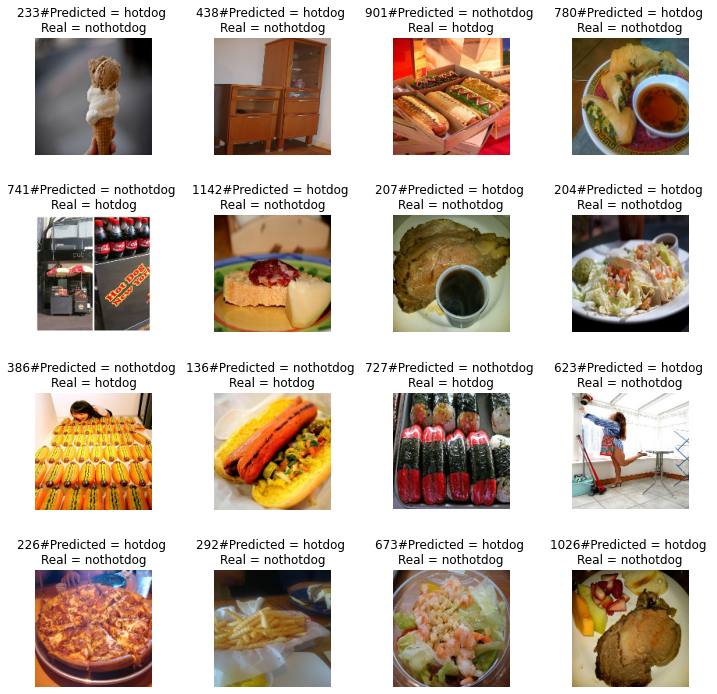

In [133]:
display_incorrect_classification(test_images, test_labels, predictions, classes)

### As we can see our most of incorrect classifications are of not-hotdog classes 
* meaning our model is predicting images with hotdogs correctly and is having trouble in deciding with images with nothotdog images

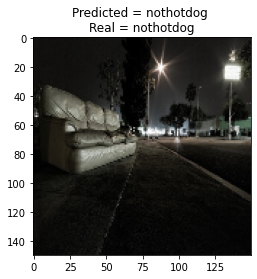

In [134]:
# Visualising Model Predictions on random image 
def random_image_predictor(images, labels, predictions, classes):
  ind = random.randint(0, len(labels))
  predicted = classes[predictions[ind]]
  real = classes[labels[ind][0]]
  plt.imshow(images[ind])
  plt.title('Predicted = {} \nReal = {}'.format(predicted, real))

random_image_predictor(test_images, test_labels, predictions, classes)

# Training Model on Pretrained Vgg16 Model with added Dense Layers..
with following parameters

* batch_size = 64  
* epochs = 20  
* optimizer = 'Adam'  
* loss = 'sparse_categorical_crossentropy'
* metrics = 'accuracy'
* validation_split = 0.3

Epoch 1/50
25/25 [==============================] - ETA: 0s - loss: 0.6970 - accuracy: 0.6033
Epoch 1: saving model to pretrained_model_checkpoints/
25/25 [==============================] - 11s 373ms/step - loss: 0.6970 - accuracy: 0.6033 - val_loss: 0.5439 - val_accuracy: 0.7619 - lr: 0.0010
Epoch 2/50
25/25 [==============================] - ETA: 0s - loss: 0.5566 - accuracy: 0.7222
Epoch 2: saving model to pretrained_model_checkpoints/
25/25 [==============================] - 9s 365ms/step - loss: 0.5566 - accuracy: 0.7222 - val_loss: 0.4725 - val_accuracy: 0.7810 - lr: 0.0010
Epoch 3/50
25/25 [==============================] - ETA: 0s - loss: 0.5073 - accuracy: 0.7561
Epoch 3: saving model to pretrained_model_checkpoints/
25/25 [==============================] - 9s 376ms/step - loss: 0.5073 - accuracy: 0.7561 - val_loss: 0.4573 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 4/50
25/25 [==============================] - ETA: 0s - loss: 0.4996 - accuracy: 0.7647
Epoch 4: saving model to p

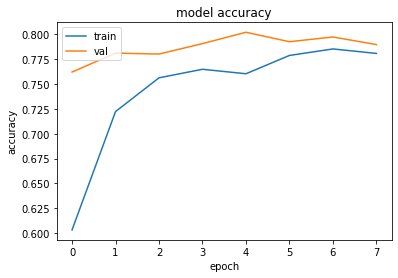

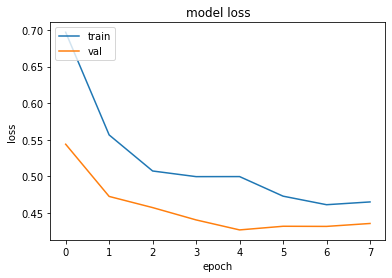

In [150]:
# Using Pretrained Vgg16 Model

# Importing Vgg16 Model and Initializing
from keras.applications.vgg16 import VGG16
model = VGG16(include_top=False, weights='imagenet', input_shape = (150, 150, 3))
model.trainable=False # We don't want to train vgg16 model weight's

# Our Model
inputs = keras.Input(shape=(150, 150, 3))
x = layers.Rescaling(scale=1./255)(inputs) # Rescaling Image pixel's
x = data_augmentation(x)                   # Augmentation Layer
x = model(x, training=False)               # pretrained vgg16 model

x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.MaxPool2D()(x)
x = layers.Dropout(0.5)(x)

x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x) 
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs, name='Hotdog_Model_1')

model = keras.Model(inputs=inputs, outputs=outputs)

# Optimizer
optimizer = Adam(learning_rate=0.001)

# Callbacks 
filepath = 'pretrained_model_checkpoints/'
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    keras.callbacks.CSVLogger('pretrained_training.log'),
    keras.callbacks.ModelCheckpoint(filepath=filepath, save_freq='epoch', save_weights_only=True, verbose=1),
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001, verbose=2),
    #keras.callbacks.LearningRateScheduler(lr_decay, verbose=1)
]

# Compiling Model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Training Our Model
history = model.fit(train_images, train_labels, epochs=50, batch_size = 100, validation_split=0.3, callbacks=callbacks)
training_graph(history)

In [151]:
# evaluate the model
_, train_acc = model.evaluate(train_images, train_labels)
_, test_acc = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images).flatten()
predictions = np.where(predictions>0.5, 1, 0)
print('Train Accuracy : %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))

36/36 [==============================] - 3s 81ms/step - loss: 0.4575 - accuracy: 0.7867
Train Accuracy : 0.809, Test Accuracy: 0.787


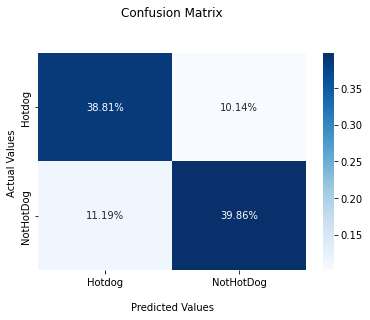

In [152]:
display_confusion_matrix(predictions, test_labels)

***We are getting accuracy of 78 percent on test set and about 81 on training set which is good as it tells us our model is not overfitting*  
*Our model is good at predicting both hotdogs and nothotdogs as the confusion matrix gives us 40 percent on True Positives and True Negatives***

# Incorrect Classification by our model..

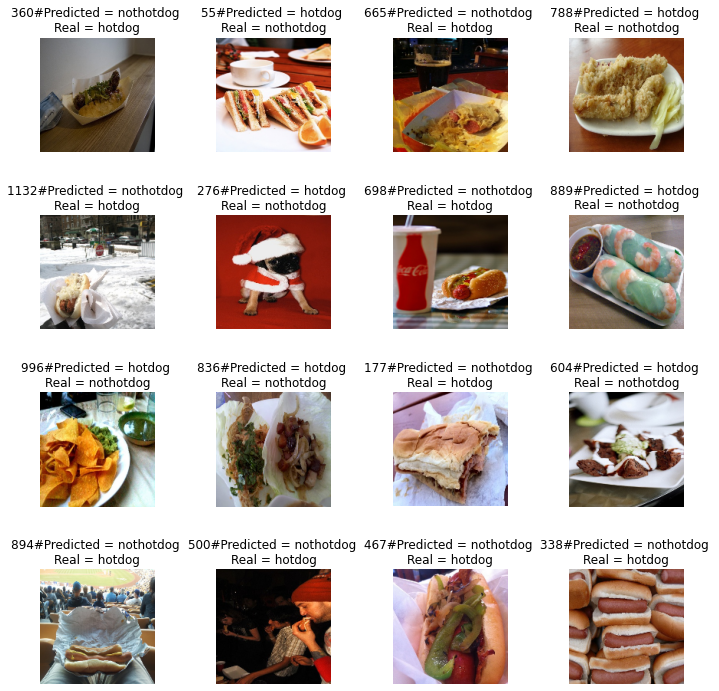

In [153]:
display_incorrect_classification(test_images, test_labels, predictions, classes)

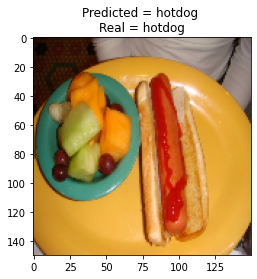

In [156]:
# Visualising Model Predictions on random image 
def random_image_predictor(images, labels, predictions, classes):
  ind = random.randint(0, len(labels))
  predicted = classes[predictions[ind]]
  real = classes[labels[ind][0]]
  plt.imshow(images[ind])
  plt.title('Predicted = {} \nReal = {}'.format(predicted, real))

random_image_predictor(test_images, test_labels, predictions, classes)

# Saving Model

In [ ]:
model_path = 'pretrained_models/'
model.save(model_path)

INFO:tensorflow:Assets written to: pretrained_models/assets
